# WINE QUALITY PREDICTION

TO BUILD A MACHINE LEARNING MODEL THAT CAN ACCURATLEY PREDICT THE QUALITY OF THE WINE BASED ON ITS PHYSICOCHEMICAL FEATURES SUCH AS ACIDITY, ALCOHOL CONTENT, PH LEVEL  AND SULPHATES.

>>>SOLUTION:
            THE SOLUTION FOR THE PROJECT IS TO PREDICT THE WINE QUALITY RATINGS BY FROM CHEMICAL FEATURES LIKE ACIDITY AND ALCOHOL USING THE DATASET.USING PYTHON BY SCALING FEATURES AND BINNING QUALITY.USING RANDOM FOREST PERFORMS BEST IN THIS PROJECT.


# import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score



In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import pickle

>># data loading

In [3]:
data=pd.read_csv("WineQT.csv")

DATASET:
        Here we take a dataset of features like types of aciditys, acids, sugar levels, and some acids and bases, ph values, sulphates, quality, and the alchohol.
        based on this we can predict the quality of the wine samples.

>># data inspection


In [4]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

Here we check the columns of the dataset taken by us.Its shows the overal columns of the dataset.

In [5]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


Here the data.head() is iused to show the top 5 rows and columns of the dataset.

In [6]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


Here the data.head() is used to check the last 5 rows of the dataset.

In [7]:
data.shape

(1143, 13)

>># exploratory data analysis(EDA)

In [8]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


CHECKING NULL VALUES

In [9]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

Here we give the code data.isnull().sum() to check weather the dataset has the null values or not.

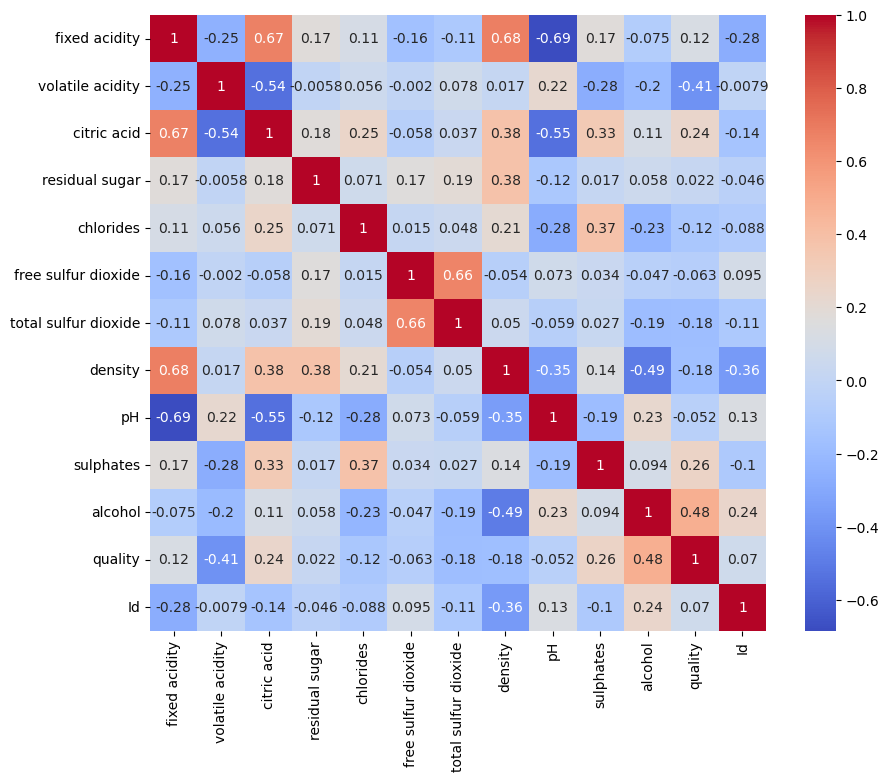

In [10]:
correlation = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', square=True)
plt.show()


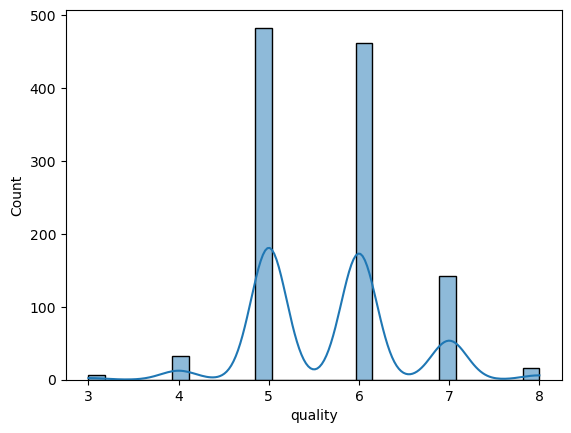

In [11]:
sns.histplot(data['quality'], kde=True)
plt.show()


>># FEATURE SELECTION


In [13]:
X = data.drop('quality', axis=1)  # Features
y = data['quality']  # Target variable



>># FEAUTURE SCALLING

In [14]:
from sklearn.preprocessing import StandardScaler

# Scale features
X_scaled = StandardScaler().fit_transform(X)

>># FEATURE ENGINEERING

In [15]:
from sklearn.preprocessing import StandardScaler

# Scale numerical features
X_scaled = StandardScaler().fit_transform(X)

In [16]:
data.describe

<bound method NDFrame.describe of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.0

>># SPLITTING DATA

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [29]:
train_accuracy = accuracy_score(y, model.predict(X)) * 100


>># MODEL SELECTION

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


>># HYPERPARAMER TUNING

In [31]:
y_pred = model.predict(X_test)


>># decission tree regression

In [32]:
#  decission tree regression
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
from sklearn.metrics import r2_score
DTR_Accuracy=round(r2_score(y_test, model.predict(X_test)) * 100)
DTR_Accuracy

-10

>># support vector regression

In [33]:
# support vector regression
from sklearn.svm import SVR
model = SVR()
model.fit(X_train, y_train)
from sklearn.metrics import r2_score
SVR_Accuracy=round(r2_score(y_test, model.predict(X_test)) * 100)
SVR_Accuracy

-2

>># polynomial regression

In [34]:
# polynomialregression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
from sklearn.linear_model import LinearRegression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
from sklearn.metrics import r2_score
PR_Accuracy=round(r2_score(y_test, poly_model.predict(X_test_poly)) * 100)
PR_Accuracy

29

>># logistic regression

In [35]:
# Convert quality to binary: 1 if quality >= 6, else 0
data['quality_class'] = (data['quality'] >= 6).astype(int)
X = data.drop(['quality', 'quality_class'], axis=1)
y = data['quality_class']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred ) * 100)

Accuracy: 75.10917030567686


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
# random forese regressor with estimate
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor(n_estimators=10)
RF_model.fit(X_train, y_train)
from sklearn.metrics import r2_score
RFR_Accuracy=round(r2_score(y_test, RF_model.predict(X_test)) * 100)
RFR_Accuracy

36

>># accuracy finding

C:\Users\RAMYASRI\AppData\Local\Temp\ipykernel_12568\995420433.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Accuracy, y=models, palette='pastel')


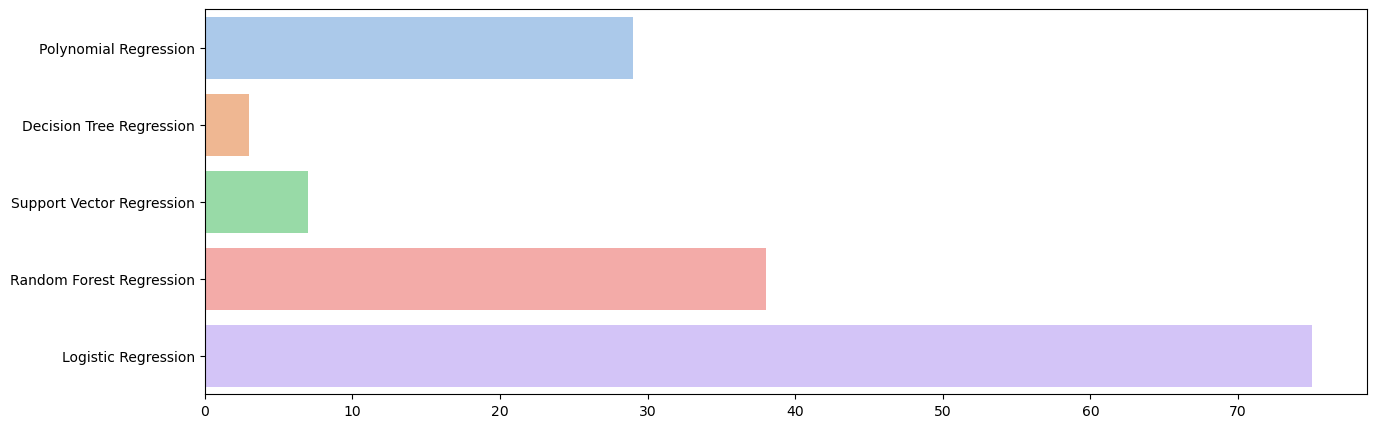

In [37]:
# Define or compute the accuracy values
PR_Accuracy = 29  # replace with actual value or calculation
DTR_Accuracy = 3
SVR_Accuracy = 7
RFR_Accuracy = 38
LogR_Accuracy = 75  # add this missing variable

# Update the model list to match the number of accuracies
models = ["Polynomial Regression", "Decision Tree Regression",
          "Support Vector Regression", "Random Forest Regression", "Logistic Regression"]

Accuracy = [PR_Accuracy, DTR_Accuracy, SVR_Accuracy, RFR_Accuracy, LogR_Accuracy]

plt.figure(figsize=(15, 5))
sns.barplot(x=Accuracy, y=models, palette='pastel')
plt.show()

>># SAVE THE MODEL

In [38]:
# save random forest  model
import pickle
pickle.dump(RF_model, open('LogR_model.pkl', 'wb'))

>># SAVE PARAMETERS

In [39]:
# save scaler parameters
from yaml import ScalarNode


pickle.dump(ScalarNode,open('scalar.pkl','wb'))

In [40]:
# Sample inputs
sample_inputs = [
    [7.4, 0.26, 0.3, 1.2, 0.038, 30, 70, 0.9902, 3.2, 0.4, 10.3, 9.0],
    [6.9, 0.32, 0.34, 1.4, 0.044, 20, 80, 0.9912, 3.1, 0.42, 9.1, 9.1 ],
]

# Predict wine quality
for i, input_data in enumerate(sample_inputs):
    predicted_quality = model.predict([input_data])[0]
    print(f"Sample {i+1} predicted quality: {predicted_quality:.2f}")

Sample 1 predicted quality: 1.00
Sample 2 predicted quality: 0.00


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
